In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score, roc_curve, auc

In [58]:
df = pd.read_csv('/home/ubuntu/MIMICmaterialized/oasis.csv')

In [59]:
# keep only adult cases
df_adult = df.loc[df['icustay_age_group'] == 'adult']

In [4]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53431 entries, 0 to 61531
Data columns (total 28 columns):
subject_id               53431 non-null int64
hadm_id                  53431 non-null int64
icustay_id               53431 non-null int64
icustay_age_group        53431 non-null object
hospital_expire_flag     53431 non-null int64
icustay_expire_flag      53431 non-null int64
oasis                    53431 non-null int64
oasis_prob               53431 non-null float64
age                      53431 non-null int64
age_score                53431 non-null int64
preiculos                53431 non-null object
preiculos_score          53431 non-null int64
gcs                      52142 non-null float64
gcs_score                52142 non-null float64
heartrate                52293 non-null float64
heartrate_score          52293 non-null float64
meanbp                   52287 non-null float64
meanbp_score             52287 non-null float64
resprate                 52228 non-null float64

In [17]:
df_adult_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48785 entries, 0 to 61531
Data columns (total 28 columns):
subject_id               48785 non-null int64
hadm_id                  48785 non-null int64
icustay_id               48785 non-null int64
icustay_age_group        48785 non-null object
hospital_expire_flag     48785 non-null int64
icustay_expire_flag      48785 non-null int64
oasis                    48785 non-null int64
oasis_prob               48785 non-null float64
age                      48785 non-null int64
age_score                48785 non-null int64
preiculos                48785 non-null object
preiculos_score          48785 non-null int64
gcs                      48785 non-null float64
gcs_score                48785 non-null float64
heartrate                48785 non-null float64
heartrate_score          48785 non-null float64
meanbp                   48785 non-null float64
meanbp_score             48785 non-null float64
resprate                 48785 non-null float64

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+01,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   7.00000000e+00,
          9.00000000e+00,   1.60000000e+01,   2.50000000e+01,
          5.10000000e+01,   1.17000000e+02,   3.67000000e+02,
          8.06000000e+02,   2.41200000e+03,   1.07520000e+04,
          1.72540000e+04,   1.64600000e+03,   6.11500000e+03,
          4.87000000e+03,   2.64000000e+03,   1.17100000e+03,
          3.53000000e+02,   1.11000000e+02,   1.70000000e+01,
          5.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

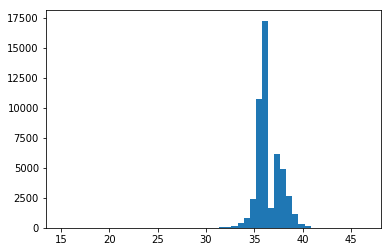

In [42]:
plt.hist(df_raw['temp'], bins=50)

In [11]:
df_adult_dropped['urineoutput'].describe()

count     48785.000000
mean       1947.167444
std        2924.587759
min       -2600.000000
25%        1023.000000
50%        1680.000000
75%        2559.000000
max      561190.000000
Name: urineoutput, dtype: float64

In [60]:
# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
df_adult_dropped = df_adult.dropna().copy()

In [90]:
 df_raw.sort_values(by=['resprate'])

,oasis_prob,icustay_id,oasis,age,gcs,heartrate,meanbp,resprate,temp,urineoutput,mechvent,electivesurgery,icustay_expire_flag
1444,0.641734,202327,53,72,6.0,94.0,36.000000,0.2,36.055556,2390.0,1,0,0
3431,0.362484,205515,44,65,14.0,120.0,55.000000,1.0,35.500000,2765.0,1,0,0
39152,0.641734,263690,53,40,15.0,137.0,27.000000,1.0,35.222223,413.0,1,0,1
44434,0.279468,272227,41,62,15.0,62.0,87.500000,1.0,34.666668,849.0,1,0,0
46530,0.109623,275583,32,82,15.0,96.0,107.000000,1.0,37.944446,1610.0,1,1,0
12739,0.581248,220589,51,70,15.0,110.0,98.000000,1.0,38.333333,387.0,1,0,1
30755,0.209226,249922,38,51,8.0,114.0,32.000000,1.0,35.800000,2925.0,0,0,0
51988,0.518217,284464,49,81,11.0,78.0,52.000000,1.0,32.400002,124.0,0,0,1
37228,0.423212,260580,46,24,15.0,115.0,150.000000,1.0,39.000000,1197.0,1,0,0
11023,0.279468,217816,41,86,15.0,77.0,41.000000,1.0,39.055556,2385.0,1,0,0


In [93]:
# create dataframe based on raw scores
df_raw = df_adult_dropped[['oasis_prob','icustay_id', 'oasis',\
                              'age', 'gcs', 'heartrate', 'meanbp', \
		 'resprate', 'temp', 'urineoutput', 'mechvent','electivesurgery', \
                              'icustay_expire_flag']].copy()

In [62]:
df_raw.describe()

,oasis_prob,icustay_id,oasis,age,gcs,heartrate,meanbp,resprate,temp,urineoutput,mechvent,electivesurgery,icustay_expire_flag
count,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000
mean,0.148383,250044.560029,31.558184,74.264364,13.761218,100.987268,69.211362,24.678115,36.468464,1947.167444,0.436302,0.123214,0.080701
std,0.145724,28922.604907,8.905333,55.050679,2.585562,24.400477,30.952398,9.794704,1.247130,2924.587759,0.495931,0.328686,0.272378
min,0.003455,200001.000000,4.000000,15.000000,3.000000,0.350000,0.200000,0.200000,15.000000,-2600.000000,0.000000,0.000000,0.000000
25%,0.048012,224961.000000,25.000000,52.000000,14.000000,89.000000,51.333302,19.000000,35.666667,1023.000000,0.000000,0.000000,0.000000
50%,0.097783,250147.000000,31.000000,65.000000,15.000000,101.000000,59.000000,26.000000,36.111111,1680.000000,0.000000,0.000000,0.000000
75%,0.188911,275131.000000,37.000000,77.000000,15.000000,116.000000,85.500000,30.000000,37.388891,2559.000000,1.000000,0.000000,0.000000
max,0.939936,299999.000000,70.000000,310.000000,15.000000,280.000000,299.000000,69.000000,46.500000,561190.000000,1.000000,1.000000,1.000000


In [68]:
df_raw.describe()

,oasis_prob,icustay_id,oasis,age,gcs,heartrate,meanbp,resprate,temp,urineoutput,mechvent,electivesurgery,icustay_expire_flag
count,48771.000000,48771.000000,48771.000000,48771.000000,48771.000000,48771.000000,48771.000000,48771.000000,48771.000000,48771.000000,48771.000000,48771.000000,48771.000000
mean,0.148342,250046.102294,31.555576,74.255213,13.761395,100.985665,69.212981,24.677654,36.468667,1934.506587,0.436345,0.123249,0.080724
std,0.145702,28923.409768,8.904708,55.039076,2.585715,24.401712,30.954801,9.795089,1.247180,1396.368121,0.495937,0.328727,0.272414
min,0.003455,200001.000000,4.000000,15.000000,3.000000,0.350000,0.200000,0.200000,15.000000,0.000000,0.000000,0.000000,0.000000
25%,0.048012,224962.500000,25.000000,52.000000,14.000000,89.000000,51.333302,19.000000,35.666667,1023.000000,0.000000,0.000000,0.000000
50%,0.097783,250152.000000,31.000000,65.000000,15.000000,101.000000,59.000000,26.000000,36.111111,1680.000000,0.000000,0.000000,0.000000
75%,0.188911,275132.500000,37.000000,77.000000,15.000000,116.000000,85.500000,30.000000,37.388891,2560.000000,1.000000,0.000000,0.000000
max,0.939936,299999.000000,70.000000,310.000000,15.000000,280.000000,299.000000,69.000000,46.500000,51520.000000,1.000000,1.000000,1.000000


In [75]:
old.describe()

,oasis_prob,icustay_id,oasis,age,gcs,heartrate,meanbp,resprate,temp,urineoutput,mechvent,electivesurgery,icustay_expire_flag
count,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000
mean,0.204481,251451.543895,35.603751,300.411812,12.951317,96.249002,60.409417,26.414206,36.097349,1362.842977,0.304070,0.026736,0.132881
std,0.163015,29310.086366,8.194383,1.344318,3.009636,25.796657,27.836603,8.789080,1.053690,2129.775534,0.460104,0.161343,0.339514
min,0.010803,200095.000000,13.000000,300.000000,3.000000,17.000000,1.000000,1.000000,29.600000,-1338.000000,0.000000,0.000000,0.000000
25%,0.087098,225378.000000,30.000000,300.000000,13.000000,73.000000,47.000000,24.000000,35.555556,707.000000,0.000000,0.000000,0.000000
50%,0.152892,252897.000000,35.000000,300.000000,14.000000,97.000000,54.000000,27.000000,35.944444,1139.500000,0.000000,0.000000,0.000000
75%,0.279468,277610.750000,41.000000,300.000000,15.000000,113.000000,61.000000,31.000000,36.333334,1760.000000,1.000000,0.000000,0.000000
max,0.903819,299919.000000,66.000000,310.000000,15.000000,222.000000,296.000000,67.000000,40.555556,98280.000000,1.000000,1.000000,1.000000


In [82]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46267 entries, 0 to 61531
Data columns (total 13 columns):
oasis_prob             46267 non-null float64
icustay_id             46267 non-null int64
oasis                  46267 non-null int64
age                    46267 non-null int64
gcs                    46267 non-null float64
heartrate              46267 non-null float64
meanbp                 46267 non-null float64
resprate               46267 non-null float64
temp                   46267 non-null float64
urineoutput            46267 non-null float64
mechvent               46267 non-null int64
electivesurgery        46267 non-null int64
icustay_expire_flag    46267 non-null int64
dtypes: float64(7), int64(6)
memory usage: 4.9 MB


In [84]:
df_raw.loc[df_raw['temp'] < 30].count()

oasis_prob             72
icustay_id             72
oasis                  72
age                    72
gcs                    72
heartrate              72
meanbp                 72
resprate               72
temp                   72
urineoutput            72
mechvent               72
electivesurgery        72
icustay_expire_flag    72
dtype: int64

In [94]:
#drop urine output lesser than 0, because you cannot urinate a negative amount
df_raw.drop(df_raw.loc[df_raw['urineoutput']<0].index, inplace=True)

# drop urine output greater than 80,000 because an average humans has 40,000cc of fluid in them.\
# Used double the mount to factor in intake from fluids.  
df_raw.drop(df_raw.loc[df_raw['urineoutput'] > 80000].index, inplace=True)

# Drop patient's with ages > 250 because no human has lived that long. 
df_raw.drop(df_raw.loc[df_raw['age'] > 250].index, inplace=True)

# df_raw.drop(df_raw.loc[df_raw['temp'] < 30].index, inplace=True)
# df_raw.drop(df_raw.loc[df_raw['temp'] > 46].index, inplace=True)

In [63]:
old = df_raw.loc[df_raw['age'] > 100].copy()

In [64]:
old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 64 to 61483
Data columns (total 13 columns):
oasis_prob             2506 non-null float64
icustay_id             2506 non-null int64
oasis                  2506 non-null int64
age                    2506 non-null int64
gcs                    2506 non-null float64
heartrate              2506 non-null float64
meanbp                 2506 non-null float64
resprate               2506 non-null float64
temp                   2506 non-null float64
urineoutput            2506 non-null float64
mechvent               2506 non-null int64
electivesurgery        2506 non-null int64
icustay_expire_flag    2506 non-null int64
dtypes: float64(7), int64(6)
memory usage: 274.1 KB


In [65]:
old.describe()

,oasis_prob,icustay_id,oasis,age,gcs,heartrate,meanbp,resprate,temp,urineoutput,mechvent,electivesurgery,icustay_expire_flag
count,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000
mean,0.204481,251451.543895,35.603751,300.411812,12.951317,96.249002,60.409417,26.414206,36.097349,1362.842977,0.304070,0.026736,0.132881
std,0.163015,29310.086366,8.194383,1.344318,3.009636,25.796657,27.836603,8.789080,1.053690,2129.775534,0.460104,0.161343,0.339514
min,0.010803,200095.000000,13.000000,300.000000,3.000000,17.000000,1.000000,1.000000,29.600000,-1338.000000,0.000000,0.000000,0.000000
25%,0.087098,225378.000000,30.000000,300.000000,13.000000,73.000000,47.000000,24.000000,35.555556,707.000000,0.000000,0.000000,0.000000
50%,0.152892,252897.000000,35.000000,300.000000,14.000000,97.000000,54.000000,27.000000,35.944444,1139.500000,0.000000,0.000000,0.000000
75%,0.279468,277610.750000,41.000000,300.000000,15.000000,113.000000,61.000000,31.000000,36.333334,1760.000000,1.000000,0.000000,0.000000
max,0.903819,299919.000000,66.000000,310.000000,15.000000,222.000000,296.000000,67.000000,40.555556,98280.000000,1.000000,1.000000,1.000000


In [86]:
df_raw_grouped = df_raw.groupby('icustay_expire_flag')

In [87]:
df_raw_grouped.mean()

,oasis_prob,icustay_id,oasis,age,gcs,heartrate,meanbp,resprate,temp,urineoutput,mechvent,electivesurgery
icustay_expire_flag,,,,,,,,,,,,
0,0.128903,250016.491769,30.443981,61.569878,13.886789,100.373748,70.538853,24.290434,36.514338,2012.604963,0.418046,0.136660
1,0.339268,249454.429207,41.892350,67.287344,12.838943,111.494298,59.682345,28.087065,36.254971,1431.791933,0.741864,0.030598


In [45]:
df_raw_grouped.mean()

,oasis_prob,icustay_id,oasis,age,gcs,heartrate,meanbp,resprate,temp,urineoutput,mechvent,electivesurgery
icustay_expire_flag,,,,,,,,,,,,
0,0.131233,250075.115649,30.631530,73.137017,13.849199,100.126831,70.124201,24.384548,36.491378,1983.374142,0.410247,0.131574
1,0.343171,249715.702311,42.078486,86.989078,12.761494,110.765939,58.836135,28.015494,36.210033,1378.009779,0.733553,0.028448


In [52]:
df_raw_grouped.mean()

,oasis_prob,icustay_id,oasis,age,gcs,heartrate,meanbp,resprate,temp,urineoutput,mechvent,electivesurgery
icustay_expire_flag,,,,,,,,,,,,
0,0.128910,250015.158475,30.444577,61.571057,13.886928,100.374173,70.536197,24.289978,36.510420,2012.639858,0.418231,0.136746
1,0.339413,249425.920644,41.897614,67.276637,12.837680,111.518452,59.666768,28.064234,36.231579,1432.914539,0.742508,0.030522


Accuracy score: 0.929
AUROC: 0.841
SMR: 3.29
Brier Score: 0.0578
Brier Score [IND]: 0.066


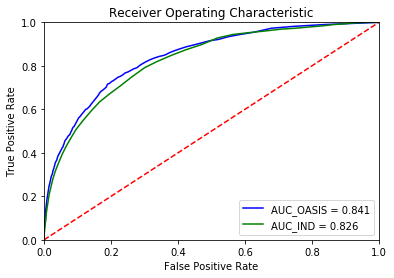

In [92]:


# create target variable
y = df_raw['icustay_expire_flag'].copy()

# create X variable
X = df_raw[['age', 'gcs', 'heartrate', 'meanbp', \
		 'resprate', 'temp', 'urineoutput', 'mechvent','electivesurgery']].copy()


# train-test split	
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y)

y_ind_prob = df_raw.loc[X_test.index]
# Train and fit model                                                   
rf = RandomForestClassifier(n_estimators = 300, random_state=0,n_jobs=-1)

rf.fit(X_train, y_train)

# Test Prediction
pred = rf.predict(X_test)
print('Accuracy score: {:.3}'.format(rf.score(X_test, y_test)))

# Get predicted probabilites 	
y_predict_proba = rf.predict_proba(X_test)

# Get predicted probabilites of 1 (Death)
y_proba = y_predict_proba[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test, y_proba)))

# Calculate Standard Mortality Rate (SMR) 
SMR = sum(y_test)/sum(pred)
print('SMR: {:.3}'.format(SMR))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference = y_proba - y_test
squared = np.square(difference)
Brier = np.mean(squared)
print('Brier Score: {:.3}'.format(Brier))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))
print('Brier Score [IND]: {:.3}'.format(np.mean(np.square(y_ind_prob['oasis_prob'] - y_test))))


# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Industry standard 
fpr_IND, tpr_IND, threshold = roc_curve(y_test, y_ind_prob['oasis_prob'])
roc_auc_IND = auc(fpr_IND, tpr_IND)

# Plot ROC curves

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC_OASIS = %0.3f' % roc_auc)
plt.plot(fpr_IND, tpr_IND, 'g', label = 'AUC_IND = %0.3f' % roc_auc_IND)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy score: 0.932
AUROC: 0.86
SMR: 3.08
Brier Score: 0.0553
Brier Score [IND]: 0.0666


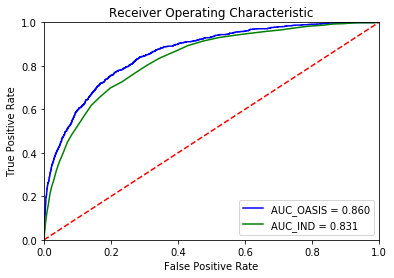

In [95]:


# create target variable
y = df_raw['icustay_expire_flag'].copy()

# create X variable
X = df_raw[['age', 'gcs', 'heartrate', 'meanbp', \
		 'resprate', 'temp', 'urineoutput', 'mechvent','electivesurgery']].copy()


# train-test split	
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y)

y_ind_prob = df_raw.loc[X_test.index]
# Train and fit model                                                   
rf = GradientBoostingClassifier( random_state=0)

rf.fit(X_train, y_train)

# Test Prediction
pred = rf.predict(X_test)
print('Accuracy score: {:.3}'.format(rf.score(X_test, y_test)))

# Get predicted probabilites 	
y_predict_proba = rf.predict_proba(X_test)

# Get predicted probabilites of 1 (Death)
y_proba = y_predict_proba[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test, y_proba)))

# Calculate Standard Mortality Rate (SMR) 
SMR = sum(y_test)/sum(pred)
print('SMR: {:.3}'.format(SMR))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference = y_proba - y_test
squared = np.square(difference)
Brier = np.mean(squared)
print('Brier Score: {:.3}'.format(Brier))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))
print('Brier Score [IND]: {:.3}'.format(np.mean(np.square(y_ind_prob['oasis_prob'] - y_test))))


# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Industry standard 
fpr_IND, tpr_IND, threshold = roc_curve(y_test, y_ind_prob['oasis_prob'])
roc_auc_IND = auc(fpr_IND, tpr_IND)

# Plot ROC curves

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC_OASIS = %0.3f' % roc_auc)
plt.plot(fpr_IND, tpr_IND, 'g', label = 'AUC_IND = %0.3f' % roc_auc_IND)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
from xgboost import XGBClassifier
from xgboost import plot_importance

Accuracy score: 0.931
AUROC: 0.86
SMR: 3.79
Brier Score: 0.0552
Brier Score [IND]: 0.0666


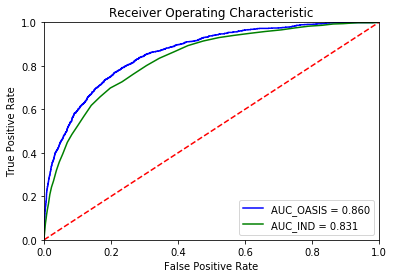

In [98]:


# create target variable
y = df_raw['icustay_expire_flag'].copy()

# create X variable
X = df_raw[['age', 'gcs', 'heartrate', 'meanbp', \
		 'resprate', 'temp', 'urineoutput', 'mechvent','electivesurgery']].copy()


# train-test split	
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y)

y_ind_prob = df_raw.loc[X_test.index]
# Train and fit model                                                   
rf = XGBClassifier( random_state=0)

rf.fit(X_train, y_train)

# Test Prediction
pred = rf.predict(X_test)
print('Accuracy score: {:.3}'.format(rf.score(X_test, y_test)))

# Get predicted probabilites 	
y_predict_proba = rf.predict_proba(X_test)

# Get predicted probabilites of 1 (Death)
y_proba = y_predict_proba[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test, y_proba)))

# Calculate Standard Mortality Rate (SMR) 
SMR = sum(y_test)/sum(pred)
print('SMR: {:.3}'.format(SMR))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference = y_proba - y_test
squared = np.square(difference)
Brier = np.mean(squared)
print('Brier Score: {:.3}'.format(Brier))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))
print('Brier Score [IND]: {:.3}'.format(np.mean(np.square(y_ind_prob['oasis_prob'] - y_test))))


# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Industry standard 
fpr_IND, tpr_IND, threshold = roc_curve(y_test, y_ind_prob['oasis_prob'])
roc_auc_IND = auc(fpr_IND, tpr_IND)

# Plot ROC curves

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC_OASIS = %0.3f' % roc_auc)
plt.plot(fpr_IND, tpr_IND, 'g', label = 'AUC_IND = %0.3f' % roc_auc_IND)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

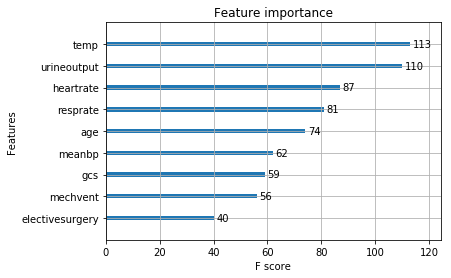

In [99]:
plot_importance(rf)
plt.show()

In [101]:
saps = pd.read_csv('/home/ubuntu/MIMICmaterialized/saps.csv')
lods = pd.read_csv('/home/ubuntu/MIMICmaterialized/lods.csv')

In [125]:
# Merge two dataframes on icustay_id	
lodsYsaps = lods.merge(df, on='icustay_id')

lodsYsaps_merged = lodsYsaps.merge(saps, on='icustay_id')

In [126]:

# keep only adult cases
lodsYsaps_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps_adult_dropped = lodsYsaps_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps_final = lodsYsaps_adult_dropped[['age_score_x', 'preiculos_score', 'gcs_score_x', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score_x','urineoutput_score', \
                              'mechvent_score','electivesurgery_score',
    
                'age', 'gcs', 'heartrate', 'meanbp', \
		 'resprate', 'temp', 'urineoutput', 'mechvent','electivesurgery', \
                                           'neurologic','cardiovascular','renal','pulmonary','hematologic',
                         'hepatic', 'age_score_y', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score_y', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score_y', 'icustay_expire_flag']].copy()




In [127]:
#drop urine output lesser than 0, because you cannot urinate a negative amount
lodsYsaps_final.drop(lodsYsaps_final.loc[lodsYsaps_final['urineoutput']<0].index, inplace=True)

# drop urine output greater than 80,000 because an average humans has 40,000cc of fluid in them.\
# Used double the mount to factor in intake from fluids.  
lodsYsaps_final.drop(lodsYsaps_final.loc[lodsYsaps_final['urineoutput'] > 80000].index, inplace=True)

# Drop patient's with ages > 250 because no human has lived that long. 
lodsYsaps_final.drop(lodsYsaps_final.loc[lodsYsaps_final['age'] > 250].index, inplace=True)

In [121]:
lodsYsaps_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44154 entries, 0 to 61531
Data columns (total 41 columns):
age_score_x              44154 non-null int64
preiculos_score          44154 non-null int64
gcs_score_x              44154 non-null float64
heartrate_score          44154 non-null float64
meanbp_score             44154 non-null float64
resprate_score           44154 non-null float64
temp_score_x             44154 non-null float64
urineoutput_score        44154 non-null float64
mechvent_score           44154 non-null int64
electivesurgery_score    44154 non-null int64
age                      44154 non-null int64
gcs                      44154 non-null float64
heartrate                44154 non-null float64
meanbp                   44154 non-null float64
resprate                 44154 non-null float64
temp                     44154 non-null float64
urineoutput              44154 non-null float64
mechvent                 44154 non-null int64
electivesurgery          44154 non-null

In [111]:
# create target variable
y_lodsYsaps = lodsYsaps_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps = lodsYsaps_final.copy()

# train-test split	
X_train_lodsYsaps, X_test_lodsYsaps, y_train_lodsYsaps, y_test_lodsYsaps = train_test_split(X_lodsYsaps, \
                                                y_lodsYsaps, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps)
# Train and fit model                                                   
rf_lodsYsaps = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps.fit(X_train_lodsYsaps, y_train_lodsYsaps)

# Test Prediction
pred_lodsYsaps = rf_lodsYsaps.predict(X_test_lodsYsaps)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps.score(X_test_lodsYsaps, y_test_lodsYsaps)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps = rf_lodsYsaps.predict_proba(X_test_lodsYsaps)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps = y_predict_proba_lodsYsaps[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps, y_proba_lodsYsaps)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps = sum(y_test_lodsYsaps)/sum(pred_lodsYsaps)
print('SMR: {:.3}'.format(SMR_lodsYsaps))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps = y_proba_lodsYsaps - y_test_lodsYsaps
squared_lodsYsaps = np.square(difference_lodsYsaps)
Brier_lodsYsaps = np.mean(squared_lodsYsaps)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps, tpr_lodsYsaps, threshold = roc_curve(y_test_lodsYsaps, y_proba_lodsYsaps)
roc_auc_lodsYsaps = auc(fpr_lodsYsaps, tpr_lodsYsaps)

Accuracy score: 0.929
AUROC: 0.865
SMR: 2.72
Brier Score: 0.0562


In [128]:
# create target variable
y_lodsYsaps = lodsYsaps_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps = lodsYsaps_final.copy()

# train-test split	
X_train_lodsYsaps, X_test_lodsYsaps, y_train_lodsYsaps, y_test_lodsYsaps = train_test_split(X_lodsYsaps, \
                                                y_lodsYsaps, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps)
# Train and fit model                                                   
rf_lodsYsaps = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps.fit(X_train_lodsYsaps, y_train_lodsYsaps)

# Test Prediction
pred_lodsYsaps = rf_lodsYsaps.predict(X_test_lodsYsaps)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps.score(X_test_lodsYsaps, y_test_lodsYsaps)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps = rf_lodsYsaps.predict_proba(X_test_lodsYsaps)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps = y_predict_proba_lodsYsaps[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps, y_proba_lodsYsaps)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps = sum(y_test_lodsYsaps)/sum(pred_lodsYsaps)
print('SMR: {:.3}'.format(SMR_lodsYsaps))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps = y_proba_lodsYsaps - y_test_lodsYsaps
squared_lodsYsaps = np.square(difference_lodsYsaps)
Brier_lodsYsaps = np.mean(squared_lodsYsaps)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps, tpr_lodsYsaps, threshold = roc_curve(y_test_lodsYsaps, y_proba_lodsYsaps)
roc_auc_lodsYsaps = auc(fpr_lodsYsaps, tpr_lodsYsaps)

Accuracy score: 0.93
AUROC: 0.87
SMR: 2.74
Brier Score: 0.0559


In [123]:
# create target variable
y_lodsYsaps = lodsYsaps_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps = lodsYsaps_final.copy()

# train-test split	
X_train_lodsYsaps, X_test_lodsYsaps, y_train_lodsYsaps, y_test_lodsYsaps = train_test_split(X_lodsYsaps, \
                                                y_lodsYsaps, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps)
# Train and fit model                                                   
rf_lodsYsaps = XGBClassifier( random_state=0)

rf_lodsYsaps.fit(X_train_lodsYsaps, y_train_lodsYsaps)

# Test Prediction
pred_lodsYsaps = rf_lodsYsaps.predict(X_test_lodsYsaps)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps.score(X_test_lodsYsaps, y_test_lodsYsaps)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps = rf_lodsYsaps.predict_proba(X_test_lodsYsaps)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps = y_predict_proba_lodsYsaps[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps, y_proba_lodsYsaps)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps = sum(y_test_lodsYsaps)/sum(pred_lodsYsaps)
print('SMR: {:.3}'.format(SMR_lodsYsaps))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps = y_proba_lodsYsaps - y_test_lodsYsaps
squared_lodsYsaps = np.square(difference_lodsYsaps)
Brier_lodsYsaps = np.mean(squared_lodsYsaps)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps, tpr_lodsYsaps, threshold = roc_curve(y_test_lodsYsaps, y_proba_lodsYsaps)
roc_auc_lodsYsaps = auc(fpr_lodsYsaps, tpr_lodsYsaps)

Accuracy score: 0.93
AUROC: 0.871
SMR: 2.98
Brier Score: 0.0555


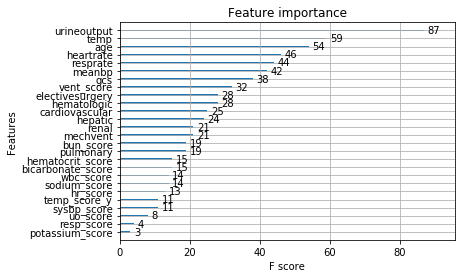

In [118]:
plot_importance(rf_lodsYsaps)
plt.show()

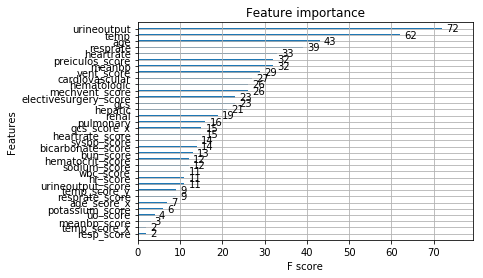

In [124]:
plot_importance(rf_lodsYsaps)
plt.show()